In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('train.csv')

In [4]:
# Dividir os dados em características e rótulos
X = data.drop(['Consumer_type', 'Consumer_number'], axis=1)
y = data['Consumer_type']

# Codificar a variável target
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Codificar variáveis categóricas com OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)
X_encoded = onehot_encoder.fit_transform(data[['Installation_zone']])
feature_labels = onehot_encoder.get_feature_names_out(['Installation_zone'])

# Criar um DataFrame com as colunas codificadas
X_encoded_df = pd.DataFrame(X_encoded, columns=feature_labels)

# Juntar com o resto do conjunto de dados (removendo a coluna original 'Installation_zone')
X = pd.concat([X.drop(['Installation_zone'], axis=1), X_encoded_df], axis=1)

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

# Escalonamento de 'Consumption'
scaler = StandardScaler()
X_train['Consumption'] = scaler.fit_transform(X_train[['Consumption']])
X_test['Consumption'] = scaler.transform(X_test[['Consumption']])

c:\Users\zezez\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.06      0.01      0.01       447
           1       0.90      1.00      0.94     47233
           2       0.39      0.03      0.06      4212
           3       0.00      0.00      0.00       200
           4       0.91      0.31      0.46      1108
           5       0.98      0.99      0.98     12617
           6       0.00      0.00      0.00       178

    accuracy                           0.91     65995
   macro avg       0.46      0.33      0.35     65995
weighted avg       0.87      0.91      0.88     65995



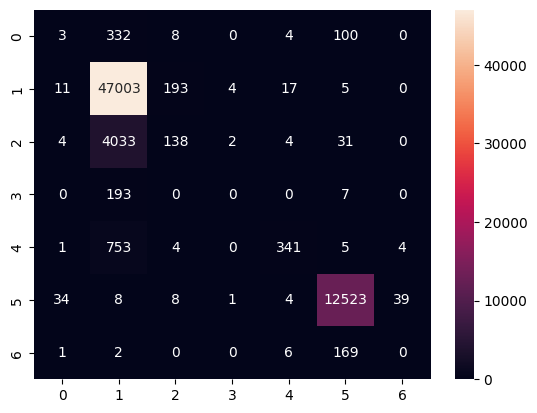

In [5]:
modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train, y_train)

# Previsões e avaliação do modelo
y_pred = modelo.predict(X_test)
print(classification_report(y_test, y_pred))

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

In [6]:
# Preparação dos resultados para submissão
consumer_numbers = data.loc[X_test.index, 'Consumer_number']
submission = pd.DataFrame({
    'Consumer_number': consumer_numbers,
    'Consumer_type_predicted': label_encoder.inverse_transform(y_pred)
})

# Salvando o arquivo de submissão
submission.to_csv('submission.csv', index=False)

# Exibir as primeiras linhas da submissão para verificação
submission.head()

,Consumer_number,Consumer_type_predicted
160742,LRML16138854704546,rural domestic
180919,KBWC43183299305847,domestic
160855,NLXC55438411508802,rural domestic
11531,YDDE20196494383239,rural domestic
129227,PMJY43557035808491,domestic
